In [ ]:
import numpy as np
import nltk
nltk.download('treebank')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import  plot_model
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Input, InputLayer, Dense, Activation, Embedding, SimpleRNN

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


In [ ]:
tagged_sentences = nltk.corpus.treebank.tagged_sents()
len(tagged_sentences)

3914

In [ ]:
tagged_sentences[0]

[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT'),
 ('board', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('nonexecutive', 'JJ'),
 ('director', 'NN'),
 ('Nov.', 'NNP'),
 ('29', 'CD'),
 ('.', '.')]

In [ ]:
sentences, sentence_tags = [],[]
for tagged_sentence in tagged_sentences:
  sentence, tags = zip(*tagged_sentence)
  sentences.append(['startseq'] +[word.lower() for word in sentence] + ['endseq'])
  sentence_tags.append(['startseq'] + [tag for tag in tags] + ['endseq'])

In [ ]:
train_sentences, test_sentences, train_tags, test_tags = train_test_split(sentences,sentence_tags,
                                                                          test_size= 0.3)



In [ ]:
valid_sentences, test_sentences, valid_tags, test_tags = train_test_split(test_sentences,test_tags,
                                                                          test_size= 0.5)

In [ ]:
# word(input word) tokenizer

word_tokenizer = Tokenizer(oov_token = "<OOV>")
word_tokenizer.fit_on_texts(train_sentences)
train_seqs = word_tokenizer.texts_to_sequences(train_sentences)
valid_seqs = word_tokenizer.texts_to_sequences(valid_sentences)

In [ ]:
max_len_word = np.max([len(seq) for seq in train_seqs])
max_len_word

273

In [ ]:
vocab_size_word = len(word_tokenizer.index_word)+1
vocab_size_word

9474

In [ ]:
train_padded_seqs = pad_sequences(train_seqs, maxlen = max_len_word, padding = 'post')
valid_padded_seqs = pad_sequences(valid_seqs, maxlen = max_len_word, padding = 'post')

In [ ]:
train_padded_seqs.shape, valid_padded_seqs.shape

((2739, 273), (587, 273))

In [ ]:
# tag tokenizer

tag_tokenizer = Tokenizer(oov_token = '<OOV>')
tag_tokenizer.fit_on_texts(train_tags)
train_tags = tag_tokenizer.texts_to_sequences(train_tags)
valid_tags = tag_tokenizer.texts_to_sequences(valid_tags)


In [ ]:
max_len_tag =np.max([len(seq) for seq in train_tags])
max_len_tag

273

In [ ]:
vocab_size_tag =len(tag_tokenizer.index_word) +1
vocab_size_tag

50

In [ ]:

train_padded_tags = pad_sequences(train_tags, maxlen = max_len_word, padding = 'post')
valid_padded_tags = pad_sequences(valid_tags, maxlen = max_len_word, padding = 'post')

In [ ]:
vocab_size_tag

50

In [ ]:
train_padded_tags.shape, valid_padded_tags.shape

((2739, 273), (587, 273))

In [ ]:
vocab_size_tag

50

In [ ]:

# convert to one hot encode
train_padded_tags = to_categorical(train_padded_tags, num_classes =vocab_size_tag )
valid_padded_tags =  to_categorical(valid_padded_tags, num_classes =vocab_size_tag )

In [ ]:
vocab_size_tag

50

In [ ]:
train_padded_tags[0].shape

(273, 50)

In [ ]:
train_padded_tags.shape, valid_padded_tags.shape

((2739, 273, 49), (587, 273, 49))

In [ ]:
embedding_dim = 200
hidden_size = 256
batch_size = 512
epochs = 50


In [ ]:
from keras.layers import Input, InputLayer, Dense, Activation, Embedding, SimpleRNN,TimeDistributed

In [ ]:
vocab_size_tag

49

In [ ]:
model_rnn = Sequential()
model_rnn.add(InputLayer(input_shape = (max_len_word,)))
model_rnn.add(Embedding(vocab_size_word, embedding_dim))
model_rnn.add(SimpleRNN(hidden_size, return_sequences= True))
model_rnn.add(TimeDistributed(Dense(vocab_size_tag)))
model_rnn.add(Activation('softmax'))

model_rnn.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])

model_rnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 273, 200)          1896200   
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 273, 256)          116992    
                                                                 
 time_distributed_7 (TimeDis  (None, 273, 49)          12593     
 tributed)                                                       
                                                                 
 activation_7 (Activation)   (None, 273, 49)           0         
                                                                 
Total params: 2,025,785
Trainable params: 2,025,785
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_rnn = model_rnn.fit(train_padded_seqs, train_padded_tags,
                            batch_size = batch_size, epochs = epochs,
                            validation_data = (valid_padded_seqs, valid_padded_tags))

Epoch 1/50
6/6 [==============================] - 6s 854ms/step - loss: 2.0905 - accuracy: 0.5664 - val_loss: 0.6119 - val_accuracy: 0.9019
Epoch 2/50
6/6 [==============================] - 3s 534ms/step - loss: 0.6923 - accuracy: 0.8981 - val_loss: 2.8256 - val_accuracy: 0.7385
Epoch 3/50
6/6 [==============================] - 3s 525ms/step - loss: 5.8660 - accuracy: 0.4490 - val_loss: 3.4136 - val_accuracy: 0.4916
Epoch 4/50
6/6 [==============================] - 3s 503ms/step - loss: 1.4924 - accuracy: 0.8007 - val_loss: 0.6212 - val_accuracy: 0.9012
Epoch 5/50
6/6 [==============================] - 4s 747ms/step - loss: 0.6352 - accuracy: 0.8953 - val_loss: 0.6427 - val_accuracy: 0.8951
Epoch 6/50
6/6 [==============================] - 3s 460ms/step - loss: 1.0498 - accuracy: 0.8495 - val_loss: 1.6579 - val_accuracy: 0.7836
Epoch 7/50
6/6 [==============================] - 3s 477ms/step - loss: 2.2115 - accuracy: 0.7074 - val_loss: 2.1238 - val_accuracy: 0.6847
Epoch 8/50
6/6 [====

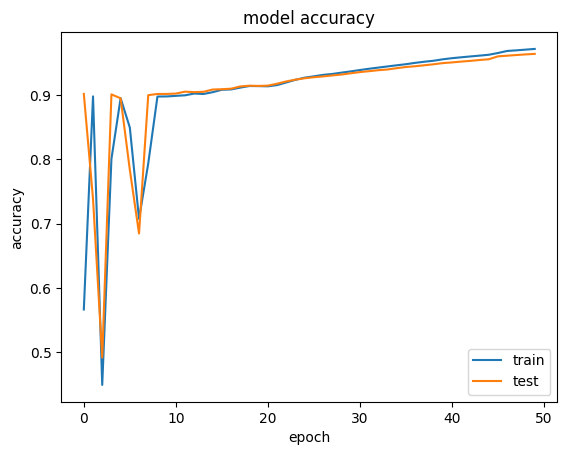

In [ ]:
plt.plot(history_rnn.history['accuracy'])
plt.plot(history_rnn.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc = 'lower right')
plt.show()

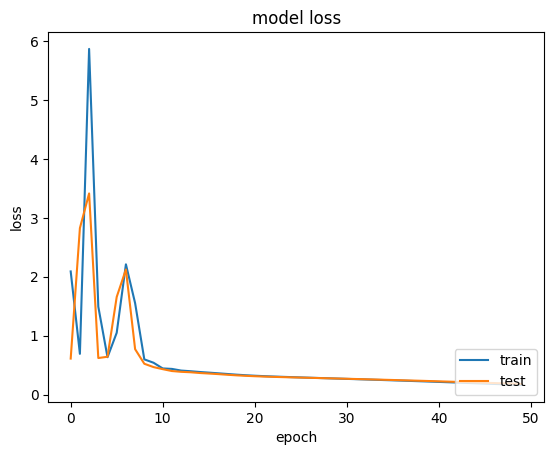

In [ ]:
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc = 'lower right')
plt.show()

# LSTM

In [ ]:
from keras.layers import LSTM, GRU, Bidirectional

In [ ]:

model_lstm = Sequential()
model_lstm.add(InputLayer(input_shape = (max_len_word,)))
model_lstm.add(Embedding(vocab_size_word, embedding_dim))
model_lstm.add(LSTM(hidden_size, return_sequences= True))
model_lstm.add(TimeDistributed(Dense(vocab_size_tag)))
model_lstm.add(Activation('softmax'))

model_lstm.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])

model_lstm.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 273, 200)          1896200   
                                                                 
 lstm (LSTM)                 (None, 273, 256)          467968    
                                                                 
 time_distributed_10 (TimeDi  (None, 273, 49)          12593     
 stributed)                                                      
                                                                 
 activation_10 (Activation)  (None, 273, 49)           0         
                                                                 
Total params: 2,376,761
Trainable params: 2,376,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_lstm = model_lstm.fit(train_padded_seqs, train_padded_tags,
                            batch_size = batch_size, epochs = epochs,
                            validation_data = (valid_padded_seqs, valid_padded_tags))

Epoch 1/50
6/6 [==============================] - 6s 361ms/step - loss: 3.2784 - accuracy: 0.7317 - val_loss: 0.5375 - val_accuracy: 0.9017
Epoch 2/50
6/6 [==============================] - 2s 268ms/step - loss: 0.5280 - accuracy: 0.8979 - val_loss: 0.5872 - val_accuracy: 0.9017
Epoch 3/50
6/6 [==============================] - 2s 318ms/step - loss: 0.5846 - accuracy: 0.8972 - val_loss: 0.5192 - val_accuracy: 0.8923
Epoch 4/50
6/6 [==============================] - 4s 766ms/step - loss: 0.5039 - accuracy: 0.8942 - val_loss: 0.4661 - val_accuracy: 0.9019
Epoch 5/50
6/6 [==============================] - 2s 399ms/step - loss: 0.4611 - accuracy: 0.8987 - val_loss: 0.4234 - val_accuracy: 0.9033
Epoch 6/50
6/6 [==============================] - 2s 349ms/step - loss: 0.4303 - accuracy: 0.9009 - val_loss: 0.4029 - val_accuracy: 0.9048
Epoch 7/50
6/6 [==============================] - 2s 274ms/step - loss: 0.4128 - accuracy: 0.9017 - val_loss: 0.3932 - val_accuracy: 0.9045
Epoch 8/50
6/6 [====

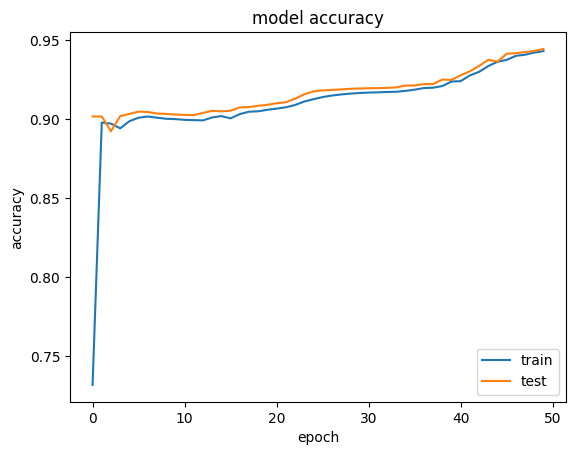

In [ ]:
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc = 'lower right')
plt.show()

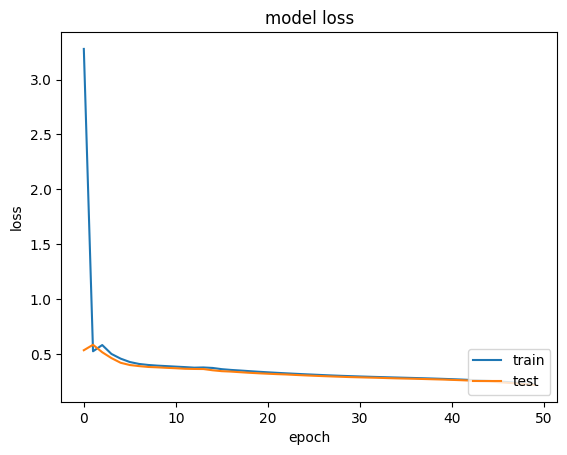

In [ ]:
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc = 'lower right')
plt.show()

# GRU

In [ ]:
model_gru = Sequential()
model_gru.add(InputLayer(input_shape = (max_len_word,)))
model_gru.add(Embedding(vocab_size_word, embedding_dim))
model_gru.add(GRU(hidden_size, return_sequences= True))
model_gru.add(TimeDistributed(Dense(vocab_size_tag)))
model_gru.add(Activation('softmax'))

model_gru.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])

model_gru.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 273, 200)          1896200   
                                                                 
 gru (GRU)                   (None, 273, 256)          351744    
                                                                 
 time_distributed_11 (TimeDi  (None, 273, 49)          12593     
 stributed)                                                      
                                                                 
 activation_11 (Activation)  (None, 273, 49)           0         
                                                                 
Total params: 2,260,537
Trainable params: 2,260,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_gru = model_gru.fit(train_padded_seqs, train_padded_tags,
                            batch_size = batch_size, epochs = epochs,
                            validation_data = (valid_padded_seqs, valid_padded_tags))

Epoch 1/50
6/6 [==============================] - 5s 329ms/step - loss: 3.5210 - accuracy: 0.7321 - val_loss: 2.3586 - val_accuracy: 0.9054
Epoch 2/50
6/6 [==============================] - 2s 383ms/step - loss: 1.0854 - accuracy: 0.9015 - val_loss: 0.6382 - val_accuracy: 0.9054
Epoch 3/50
6/6 [==============================] - 2s 270ms/step - loss: 0.6308 - accuracy: 0.9022 - val_loss: 0.3914 - val_accuracy: 0.9139
Epoch 4/50
6/6 [==============================] - 2s 269ms/step - loss: 0.4120 - accuracy: 0.9056 - val_loss: 0.4007 - val_accuracy: 0.9057
Epoch 5/50
6/6 [==============================] - 2s 265ms/step - loss: 0.4162 - accuracy: 0.9017 - val_loss: 0.3954 - val_accuracy: 0.9056
Epoch 6/50
6/6 [==============================] - 1s 237ms/step - loss: 0.4082 - accuracy: 0.9019 - val_loss: 0.3871 - val_accuracy: 0.9076
Epoch 7/50
6/6 [==============================] - 1s 251ms/step - loss: 0.3993 - accuracy: 0.9056 - val_loss: 0.3799 - val_accuracy: 0.9121
Epoch 8/50
6/6 [====

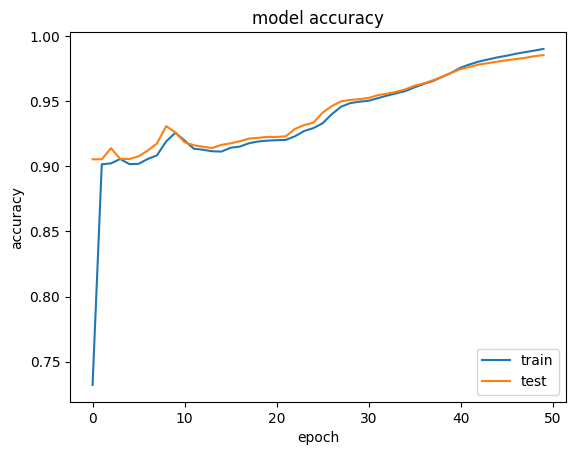

In [ ]:
plt.plot(history_gru.history['accuracy'])
plt.plot(history_gru.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc = 'lower right')
plt.show()

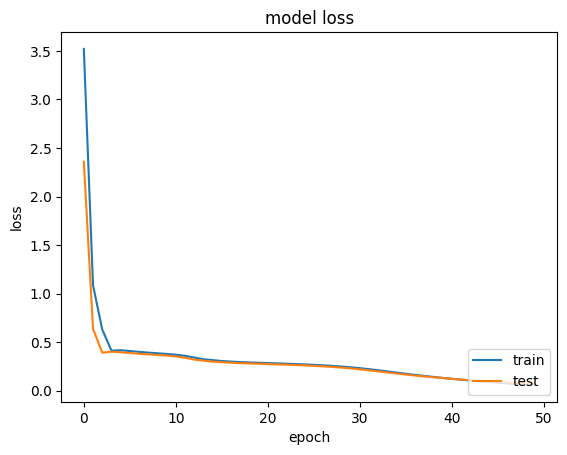

In [ ]:
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc = 'lower right')
plt.show()

# Bidirectional GRU

In [ ]:
model_bigru = Sequential()
model_bigru.add(InputLayer(input_shape = (max_len_word,)))
model_bigru.add(Embedding(vocab_size_word, embedding_dim))
model_bigru.add(Bidirectional(GRU(hidden_size, return_sequences= True)))
model_bigru.add(TimeDistributed(Dense(vocab_size_tag)))
model_bigru.add(Activation('softmax'))

model_bigru.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])

model_bigru.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 273, 200)          1896200   
                                                                 
 bidirectional (Bidirectiona  (None, 273, 512)         703488    
 l)                                                              
                                                                 
 time_distributed_12 (TimeDi  (None, 273, 49)          25137     
 stributed)                                                      
                                                                 
 activation_12 (Activation)  (None, 273, 49)           0         
                                                                 
Total params: 2,624,825
Trainable params: 2,624,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_bigru = model_bigru.fit(train_padded_seqs, train_padded_tags,
                            batch_size = batch_size, epochs = epochs,
                            validation_data = (valid_padded_seqs, valid_padded_tags))

Epoch 1/50
6/6 [==============================] - 7s 457ms/step - loss: 3.2932 - accuracy: 0.7315 - val_loss: 1.6497 - val_accuracy: 0.9017
Epoch 2/50
6/6 [==============================] - 2s 382ms/step - loss: 0.7997 - accuracy: 0.8979 - val_loss: 0.5394 - val_accuracy: 0.9017
Epoch 3/50
6/6 [==============================] - 2s 361ms/step - loss: 0.4555 - accuracy: 0.8994 - val_loss: 0.3790 - val_accuracy: 0.9132
Epoch 4/50
6/6 [==============================] - 2s 301ms/step - loss: 0.3958 - accuracy: 0.9056 - val_loss: 0.3827 - val_accuracy: 0.9052
Epoch 5/50
6/6 [==============================] - 2s 322ms/step - loss: 0.3977 - accuracy: 0.9016 - val_loss: 0.3802 - val_accuracy: 0.9067
Epoch 6/50
6/6 [==============================] - 2s 319ms/step - loss: 0.3930 - accuracy: 0.9053 - val_loss: 0.3734 - val_accuracy: 0.9184
Epoch 7/50
6/6 [==============================] - 2s 319ms/step - loss: 0.3851 - accuracy: 0.9225 - val_loss: 0.3652 - val_accuracy: 0.9266
Epoch 8/50
6/6 [====

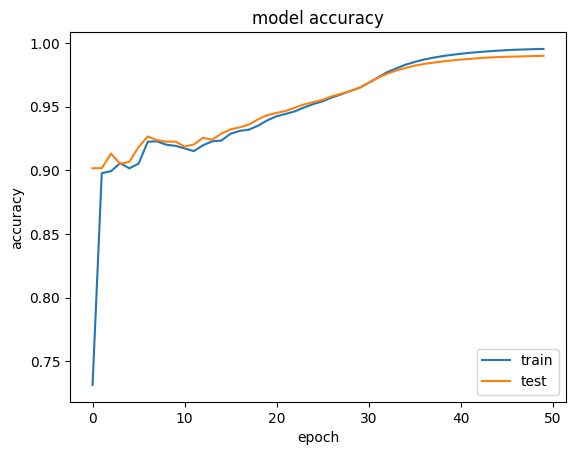

In [ ]:
plt.plot(history_bigru.history['accuracy'])
plt.plot(history_bigru.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc = 'lower right')
plt.show()

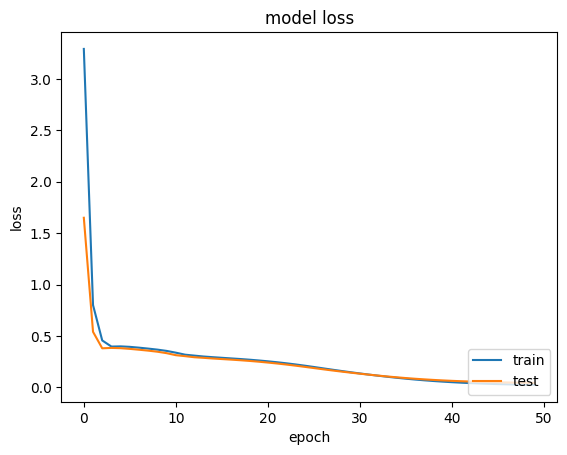

In [ ]:
plt.plot(history_bigru.history['loss'])
plt.plot(history_bigru.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc = 'lower right')
plt.show()

# Stack GRU

In [ ]:
model_tackgru = Sequential()
model_tackgru.add(InputLayer(input_shape = (max_len_word,)))
model_tackgru.add(Embedding(vocab_size_word, embedding_dim))
model_tackgru.add(GRU(hidden_size, return_sequences= True))
model_tackgru.add(GRU(hidden_size, return_sequences= True))
model_tackgru.add(TimeDistributed(Dense(vocab_size_tag)))
model_tackgru.add(Activation('softmax'))

model_tackgru.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])

model_tackgru.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 273, 200)          1896200   
                                                                 
 gru_2 (GRU)                 (None, 273, 256)          351744    
                                                                 
 gru_3 (GRU)                 (None, 273, 256)          394752    
                                                                 
 time_distributed_13 (TimeDi  (None, 273, 49)          12593     
 stributed)                                                      
                                                                 
 activation_13 (Activation)  (None, 273, 49)           0         
                                                                 
Total params: 2,655,289
Trainable params: 2,655,289
Non-trainable params: 0
___________________________________________

In [ ]:
history_model_tackgru= model_tackgru.fit(train_padded_seqs, train_padded_tags,
                            batch_size = batch_size, epochs = epochs,
                            validation_data = (valid_padded_seqs, valid_padded_tags))

Epoch 1/50
6/6 [==============================] - 7s 416ms/step - loss: 3.0198 - accuracy: 0.7304 - val_loss: 0.4225 - val_accuracy: 0.9017
Epoch 2/50
6/6 [==============================] - 2s 288ms/step - loss: 0.5792 - accuracy: 0.8979 - val_loss: 0.4814 - val_accuracy: 0.9017
Epoch 3/50
6/6 [==============================] - 2s 287ms/step - loss: 0.4265 - accuracy: 0.8985 - val_loss: 0.4091 - val_accuracy: 0.9028
Epoch 4/50
6/6 [==============================] - 2s 295ms/step - loss: 0.4301 - accuracy: 0.8987 - val_loss: 0.4059 - val_accuracy: 0.9033
Epoch 5/50
6/6 [==============================] - 2s 350ms/step - loss: 0.4163 - accuracy: 0.8996 - val_loss: 0.3890 - val_accuracy: 0.9039
Epoch 6/50
6/6 [==============================] - 2s 370ms/step - loss: 0.3997 - accuracy: 0.9016 - val_loss: 0.3788 - val_accuracy: 0.9131
Epoch 7/50
6/6 [==============================] - 2s 292ms/step - loss: 0.3901 - accuracy: 0.9115 - val_loss: 0.3720 - val_accuracy: 0.9135
Epoch 8/50
6/6 [====

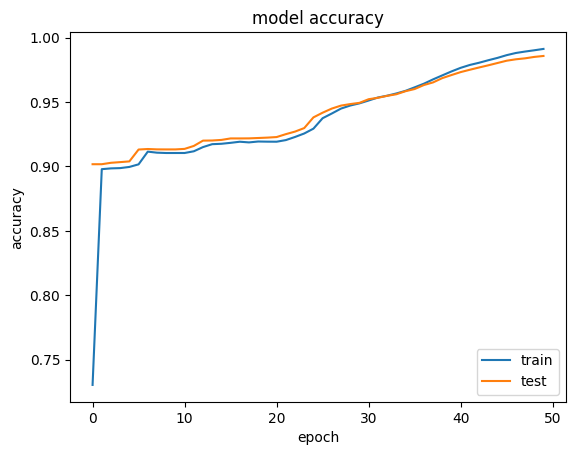

In [ ]:
plt.plot(history_model_tackgru.history['accuracy'])
plt.plot(history_model_tackgru.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc = 'lower right')
plt.show()

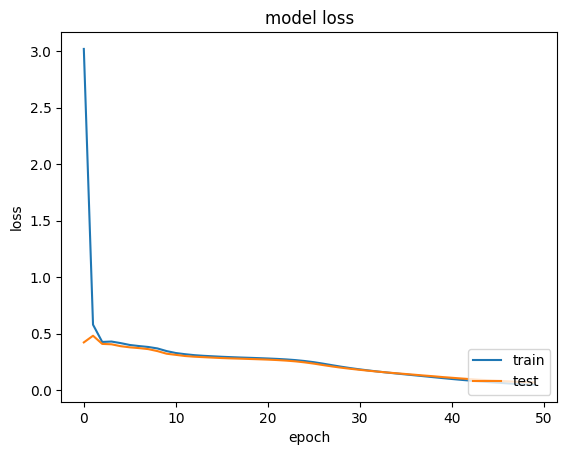

In [ ]:
plt.plot(history_model_tackgru.history['loss'])
plt.plot(history_model_tackgru.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc = 'lower right')
plt.show()

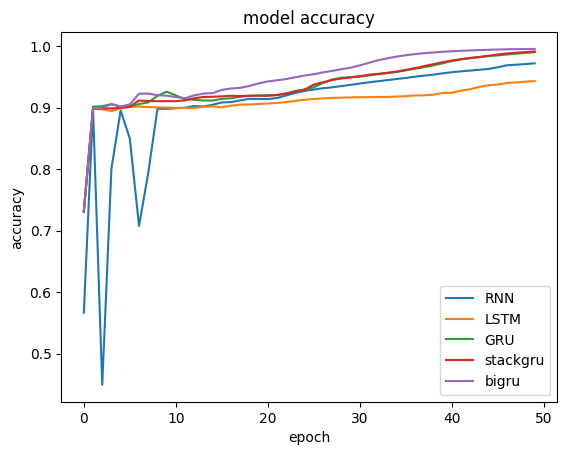

In [ ]:
plt.plot(history_rnn.history['accuracy'])

plt.plot(history_lstm.history['accuracy'])

plt.plot(history_gru.history['accuracy'])

plt.plot(history_model_tackgru.history['accuracy'])
plt.plot(history_bigru.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['RNN','LSTM','GRU','stackgru','bigru'], loc = 'lower right')
plt.show()